In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()
accuracy = []

In [3]:
dataset.id.shape

(5110,)

In [4]:
# 在进行数据处理以及建模之前，我们有一些因素的值对于是否中风很少或者没有影响。为了增强数据处理的便捷性，首先我们将进行无关因素的删除。由表示出的数据可以看出，参与者的id类别太多，有5110个独特变量。下面进行该栏数据的删除。

In [5]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# 通过遗失数据的查找，可以看到，在bim一栏的有201个遗失数据，其他的elements没有遗失变量，所以接下来将针对bmi一栏，采取三种方法，进行数据的完善。第一种方法：将数据集中丢失bmi数据的行进行删除；第二种方法：数据集的均值估算丢失值，进行遗失数据的补充；第三种方法：利用回归模型进行缺失值预测。

In [7]:
#方法一：从数据集中删除丢失数据的行
#优点：可以创建一个健壮的模型。
#缺点：大量信息丢失。/如果与完整的数据集相比，缺失值的百分比过大，则效果不佳。
dataset.dropna(subset=['bmi'], inplace=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# 可以看出在删除掉空缺值后，剩下4909个样本容量。

In [9]:
#方法二：数据集的均值估算丢失值
#优点：防止导致删除行或列的数据丢失/在一个小的数据集上运行良好，并且易于实现。
#缺点：仅适用于数值连续变量。/不考虑特征之间的协方差。
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.drop('id',
  axis='columns', inplace=True)
dataset["bmi"] = dataset["bmi"].replace(np.NaN, dataset["bmi"].mean())

In [10]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
smoking_status_num = []
for x in dataset["smoking_status"]:
    if x=='never smoked':
       smoking_status_num.append(0)
    elif x=='formerly smoked':
       smoking_status_num.append(1)
    elif x=='smokes':
       smoking_status_num.append(2)
    elif x=='Unknown':
       smoking_status_num.append(3)

In [12]:
#新建一个column
dataset['smoking_status_num'] = smoking_status_num

In [13]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_num
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [14]:
dataset.describe(include = 'all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_num
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728,1.388454
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320,1.258047
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000,1.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000,3.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5110 non-null   object 
 1   age                 5110 non-null   float64
 2   hypertension        5110 non-null   int64  
 3   heart_disease       5110 non-null   int64  
 4   ever_married        5110 non-null   object 
 5   work_type           5110 non-null   object 
 6   Residence_type      5110 non-null   object 
 7   avg_glucose_level   5110 non-null   float64
 8   bmi                 5110 non-null   float64
 9   smoking_status      5110 non-null   object 
 10  stroke              5110 non-null   int64  
 11  smoking_status_num  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
dataset.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
smoking_status_num    0
dtype: int64

In [17]:
dataset["gender"] = [1 if x=="Male" else 0 for x in dataset["gender"]]
dataset["Residence_type"] = [1 if x=="Urban" else 0 for x in dataset["Residence_type"]]
dataset["ever_married"] = [1 if x=="Yes" else 0 for x in dataset["ever_married"]]
map_2={'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
dataset['work_type'] = dataset['work_type'].map(map_2)

In [18]:

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_num
0,1,67.0,0,1,1,0,1,228.69,36.600000,formerly smoked,1,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,never smoked,1,0
2,1,80.0,0,1,1,0,0,105.92,32.500000,never smoked,1,0
3,0,49.0,0,0,1,0,1,171.23,34.400000,smokes,1,2
4,0,79.0,1,0,1,1,0,174.12,24.000000,never smoked,1,0


In [19]:
dataset.drop(['work_type', 'smoking_status'], axis=1)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_num
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,2
4,0,79.0,1,0,1,0,174.12,24.000000,1,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,1


In [20]:
# Model building 
# Random Forest 

In [21]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_num
0,1,67.0,0,1,1,0,1,228.69,36.600000,formerly smoked,1,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,never smoked,1,0
2,1,80.0,0,1,1,0,0,105.92,32.500000,never smoked,1,0
3,0,49.0,0,0,1,0,1,171.23,34.400000,smokes,1,2
4,0,79.0,1,0,1,1,0,174.12,24.000000,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,never smoked,0,0
5106,0,81.0,0,0,1,1,1,125.20,40.000000,never smoked,0,0
5107,0,35.0,0,0,1,1,0,82.99,30.600000,never smoked,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,formerly smoked,0,1


In [22]:
X = dataset.drop(['stroke','smoking_status'],axis =1)
y = dataset['stroke']

In [23]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status_num
0,1,67.0,0,1,1,0,1,228.69,36.600000,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,0
2,1,80.0,0,1,1,0,0,105.92,32.500000,0
3,0,49.0,0,0,1,0,1,171.23,34.400000,2
4,0,79.0,1,0,1,1,0,174.12,24.000000,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,0
5106,0,81.0,0,0,1,1,1,125.20,40.000000,0
5107,0,35.0,0,0,1,1,0,82.99,30.600000,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,1


In [24]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [25]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [26]:
# random forest model 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 150)

In [27]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = RF.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions)*100)
accuracy.append(accuracy_score(y_test, predictions)*100)


[[1218    2]
 [  56    2]]
95.46165884194053


In [29]:
names = dataset.columns
sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), names), reverse=True)

[(0.2825, 'avg_glucose_level'),
 (0.2384, 'age'),
 (0.225, 'bmi'),
 (0.0692, 'smoking_status'),
 (0.049, 'work_type'),
 (0.0348, 'Residence_type'),
 (0.0332, 'gender'),
 (0.0262, 'hypertension'),
 (0.0224, 'heart_disease'),
 (0.0192, 'ever_married')]

In [30]:
# GradientBoost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbdt = GradientBoostingClassifier(random_state = 10)
gbdt.fit(X_train, y_train)
prediction_1 = gbdt.predict(X_test)
print(confusion_matrix(y_test, prediction_1))
print(accuracy_score(y_test, prediction_1)*100)
accuracy.append(accuracy_score(y_test, prediction_1)*100)

[[1216    4]
 [  57    1]]
95.22691705790297


In [33]:
# LR

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))
accuracy.append(logreg.score(X_test, y_test)*100)
accuracy

Accuracy of logistic regression classifier on test set: 94.99


[95.46165884194053, 95.22691705790297, 94.99217527386541]

In [36]:
# AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [38]:
regressor = AdaBoostRegressor()
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
regressor.fit(X_train,y_train)
pred_y = regressor.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)
accuracy

Accuracy: 95.38341158059468


[95.46165884194053, 95.22691705790297, 94.99217527386541, 95.38341158059468]

In [40]:
# Decision Tree

In [41]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
regressor.fit(X_train,y_train)
pred_y = regressor.predict(X_test)

In [42]:
X_Train,X_Test,y_Train,y_Test= train_test_split(X,y,test_size=0.25,random_state=123)

In [43]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [44]:
X = dataset[["age","hypertension","heart_disease","avg_glucose_level","bmi","gender","work_type","Residence_type","ever_married","smoking_status"]]
y = dataset["stroke"]
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.39292219, -0.46749346,  0.02768473,  0.06441362, -0.50323135,
        0.16437202,  0.11242982, -0.73798979, -0.30953155, -0.00137327])

In [45]:
dtdt = DecisionTreeClassifier(random_state = 10)
dtdt.fit(X_train, y_train)
prediction_1 = dtdt.predict(X_test)
print(confusion_matrix(y_test, prediction_1))
print(accuracy_score(y_test, prediction_1)*100)
accuracy.append(accuracy_score(y_test, prediction_1)*100)
accuracy

[[1166   54]
 [  51    7]]
91.78403755868545


[95.46165884194053,
 95.22691705790297,
 94.99217527386541,
 95.38341158059468,
 91.78403755868545]

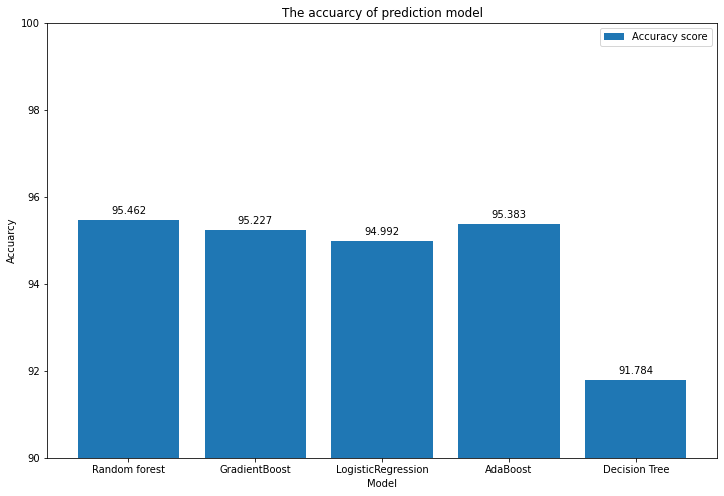

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(['Random forest','GradientBoost','LogisticRegression','AdaBoost','Decision Tree'],
        accuracy, 
        align='center',
        label='Accuracy score')

plt.legend()
plt.ylabel('Accuarcy')
plt.xlabel('Model')
plt.title('The accuarcy of prediction model')
plt.ylim(90,100)
x = ['Random forest','GradientBoost','LogisticRegression','AdaBoost','Decision Tree']
y = accuracy
for a,b in zip(x,y):
 plt.text(a,b+0.1,'%.3f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()


In [47]:
score={'Algorithm':['Random dorest','GradientBoost','Logistic Regression','AdaBoost','Decision Tree']
       ,'Accuracy score':
[95.38341158059468,
 95.22691705790297,
 94.99217527386541,
 95.38341158059468,
 91.78403755868545]}
pd.DataFrame(score)

,Algorithm,Accuracy score
0,Random dorest,95.383412
1,GradientBoost,95.226917
2,Logistic Regression,94.992175
3,AdaBoost,95.383412
4,Decision Tree,91.784038
